In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("city_data.csv")
ride_data_to_load = pd.read_csv("ride_data.csv")

# Read the City and Ride Data
city_data_to_load.head()




,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
ride_data_to_load.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [9]:
# Combine the data into a single dataset
combined_pyber_data = pd.merge(ride_data_to_load, city_data_to_load, on="city",how="left")
combined_pyber_data.head()
# Display the data table for preview




,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


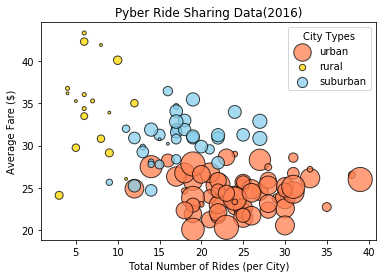

In [78]:
# Obtain the x and y coordinates for each of the three city types

#unique type(urban)
unique_type_urban=combined_pyber_data[combined_pyber_data["type"]=="Urban"]
#avg fare(urban)
avg_fare_urban=unique_type_urban.groupby("city").mean()["fare"]
# ride count
ride_count_urban=unique_type_urban.groupby("city").count()["fare"]


#unique type(rural)
unique_type_rural=combined_pyber_data[combined_pyber_data["type"]=="Rural"]
#avg fare(rural)
avg_fare_rural=unique_type_rural.groupby("city").mean()["fare"]
#ride count
ride_count_rural=unique_type_rural.groupby("city").count()["fare"]


#unique type(suburban)
unique_type_suburban=combined_pyber_data[combined_pyber_data["type"]=="Suburban"]
#average fare(Suburban)
avg_fare_suburban=unique_type_suburban.groupby("city").mean()["fare"]
#ride_count
ride_count_suburban=unique_type_suburban.groupby("city").count()["fare"]



# Build the scatter plots for each city types
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")

plt.scatter(ride_count_urban, avg_fare_urban, marker="o", facecolors="coral", edgecolors="black",
            s=(unique_type_urban["driver_count"])*8, alpha=0.75,label="urban")
plt.scatter(ride_count_rural, avg_fare_rural, marker="o", facecolors="gold", edgecolors="black",
            s=(unique_type_rural["driver_count"])*8, alpha=0.75,label="rural")
plt.scatter(ride_count_suburban, avg_fare_suburban, marker="o", facecolors="skyblue", edgecolors="black",
            s=(unique_type_suburban["driver_count"])*8, alpha=0.75,label="suburban")
legend1=plt.legend(loc="best",title="City Types")
legend1
plt.show()

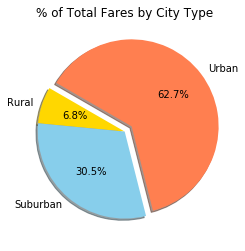

In [87]:
#Total Fares by City Type
# Calculate Type Percents
total_fare=combined_pyber_data["fare"].sum()
fare_percentage_per_type=combined_pyber_data.groupby("type")['fare'].sum()

type_percentage=(fare_percentage_per_type/total_fare)*100

plt.title("% of Total Fares by City Type")
city_type=["Rural","Suburban","Urban"]
colors=["gold","skyblue","coral"]
explode = (0, 0, 0.1)

citytype_chart=plt.pie(type_percentage, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

plt.show()


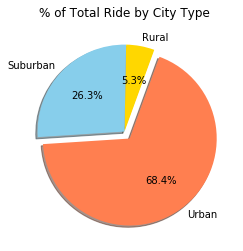

In [82]:
#Total Ride by City Type
# Calculate Ride Percents
total_ride=combined_pyber_data["driver_count"].count()
ride_count_citytype=combined_pyber_data.groupby("type")['driver_count'].count()

ride_percentage=(ride_count_citytype/total_ride)*100


# Build Pie Chart
plt.title("% of Total Ride by City Type")
ride_percentage_chart=plt.pie(ride_percentage, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=70)
# Save Figure
plt.show()

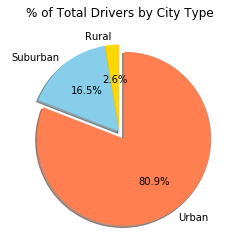

In [89]:
#Total Drivers by City Type
# Calculate Driver Percents
total_driver=city_data_to_load["driver_count"].sum()
driver_count_type=city_data_to_load.groupby("type")['driver_count'].sum()
driver_percentage_type=(driver_count_type/total_driver)*100
# Build Pie Charts
plt.title("% of Total Drivers by City Type")
driver_percentage_chart=plt.pie(driver_percentage_type, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()
